## Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset:

In [2]:
df = pd.read_csv("C:/Users/Priya Sharma/OneDrive/Desktop/retail_data.csv")
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
SET 36 COLOURING PENCILS DOILEY           1
Found by jackie                           1
VINTAGE BEAD PINK JEWEL STAND             1
? sold as sets?                           1
rcvd be air temp fix for dotcom sit       1
Name: Description, Length: 4223, dtype: int64

## Droping unusefull columns:

In [6]:
df.drop(["Description", "StockCode"], axis=1, inplace=True)
df.head(3)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,8,12-01-2010 08:26,2.75,17850.0,United Kingdom


In [7]:
df.shape

(541909, 6)

In [8]:
df.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [10]:
df.dropna(how='any', axis=0, inplace=True)

In [11]:
df.head(3)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,8,12-01-2010 08:26,2.75,17850.0,United Kingdom


In [12]:
df.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [13]:
print(df.UnitPrice.min())
print(df.UnitPrice.max())

0.0
38970.0


In [14]:
df.Quantity.value_counts().sort_index()

-80995    1
-74215    1
-9360     1
-3114     1
-2000     1
         ..
 4300     1
 4800     1
 12540    1
 74215    1
 80995    1
Name: Quantity, Length: 436, dtype: int64

## Removing the negative values in quantity column:

In [15]:
negative = df[df.Quantity <= 0]
negative

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,-1,12-01-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,-1,12-01-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,-12,12-01-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...
540449,C581490,-11,12-09-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,-1,12-09-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,-5,12-09-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,-1,12-09-2011 11:58,1.25,17315.0,United Kingdom


In [16]:
df = df[df.Quantity >= 0]

In [17]:
df.Quantity.value_counts().sort_values()

87          1
492         1
246         1
2040        1
348         1
        ...  
4       32183
6       37688
2       58003
12      60033
1       73314
Name: Quantity, Length: 302, dtype: int64

In [18]:
df.reset_index(drop=True)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
397919,581587,12,12-09-2011 12:50,0.85,12680.0,France
397920,581587,6,12-09-2011 12:50,2.10,12680.0,France
397921,581587,4,12-09-2011 12:50,4.15,12680.0,France
397922,581587,4,12-09-2011 12:50,4.15,12680.0,France


In [19]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [20]:
df.shape

(397924, 6)

## Creating revenue:

In [21]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [22]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [23]:
df.Revenue.min()

0.0

In [24]:
df.Revenue.max()

168469.6

## Dividing InvoiceDate:

In [25]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [26]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [27]:
df['Year'] = df['InvoiceDate'].dt.year

df['Month'] = df['InvoiceDate'].dt.month

df['Day'] = df['InvoiceDate'].dt.day

In [28]:
df.drop('InvoiceDate', axis=1, inplace=True)

In [29]:
df.head()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day
0,536365,6,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,6,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,8,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,6,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,6,3.39,17850.0,United Kingdom,20.34,2010,12,1


In [30]:
corrDf = df.corr()
corrDf

,Quantity,UnitPrice,CustomerID,Revenue,Year,Month,Day
Quantity,1.000000,-0.004561,-0.006411,0.908812,0.001595,-0.004006,-0.000884
UnitPrice,-0.004561,1.000000,-0.010863,0.081646,-0.000191,-0.005171,-0.001277
CustomerID,-0.006411,-0.010863,1.000000,-0.004104,-0.036352,0.030417,-0.002491
Revenue,0.908812,0.081646,-0.004104,1.000000,0.000431,-0.002733,-0.001954
Year,0.001595,-0.000191,-0.036352,0.000431,1.000000,-0.340655,0.169515
Month,-0.004006,-0.005171,0.030417,-0.002733,-0.340655,1.000000,-0.118007
Day,-0.000884,-0.001277,-0.002491,-0.001954,0.169515,-0.118007,1.000000


<AxesSubplot:>

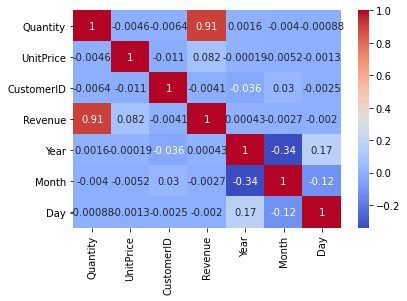

In [31]:
sns.heatmap(corrDf, xticklabels=corrDf.columns, yticklabels=corrDf.columns, cmap='coolwarm', annot=True)

## Checking unique columns:

In [32]:
df.columns

Index(['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'Country',
       'Revenue', 'Year', 'Month', 'Day'],
      dtype='object')

In [33]:
columns = ['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day']

In [34]:
for i in columns:
    print('No.of unique values', i, 'is=', len(np.unique(df[i])))

No.of unique values InvoiceNo is= 18536
No.of unique values Quantity is= 302
No.of unique values UnitPrice is= 441
No.of unique values CustomerID is= 4339
No.of unique values Country is= 37
No.of unique values Year is= 2
No.of unique values Month is= 12
No.of unique values Day is= 31


In [35]:
df.head()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day
0,536365,6,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,6,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,8,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,6,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,6,3.39,17850.0,United Kingdom,20.34,2010,12,1


# Visualization:

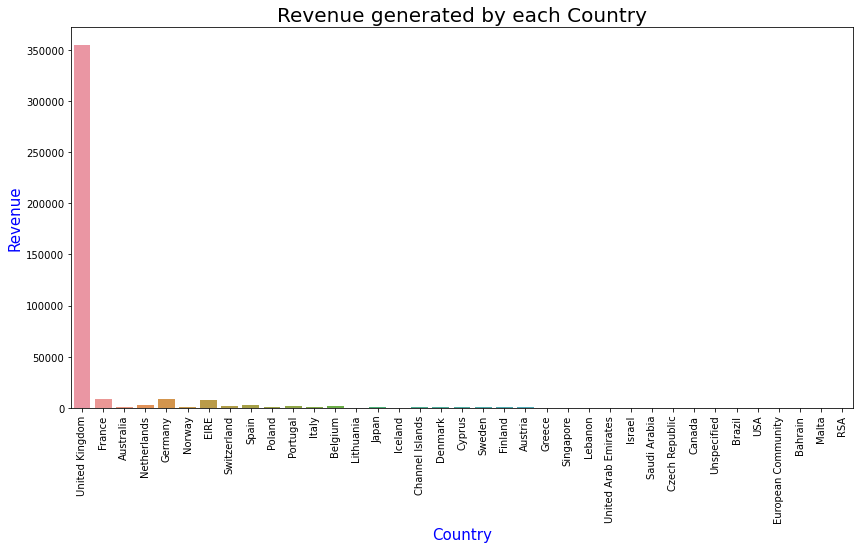

In [36]:
plt.figure(figsize=[14, 7])
sns.countplot(x='Country', data=df)
plt.title("Revenue generated by each Country",size=20)
plt.xlabel('Country', fontsize=15, c='b')
plt.ylabel("Revenue", fontsize=15, c='b')
plt.xticks(rotation=90)
plt.show()

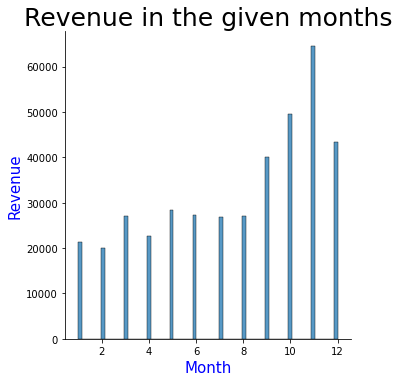

In [37]:
sns.displot(x='Month', data=df)
plt.title("Revenue in the given months",size=25)
plt.xlabel('Month', fontsize=15, c='b')
plt.ylabel("Revenue", fontsize=15, c='b')
plt.show()

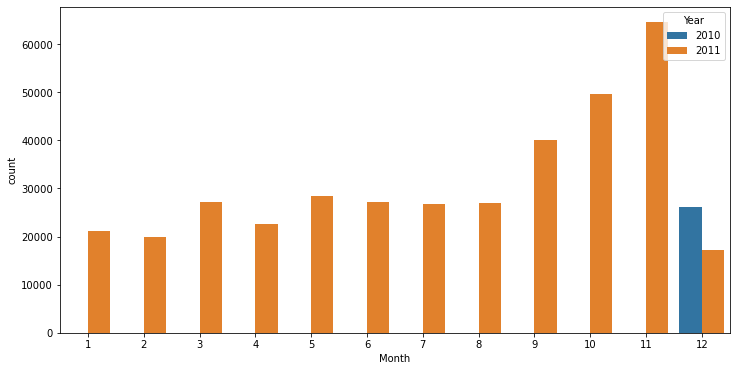

In [38]:
plt.figure(figsize=[12, 6])
sns.countplot(x='Month', hue='Year', data = df)
plt.show()

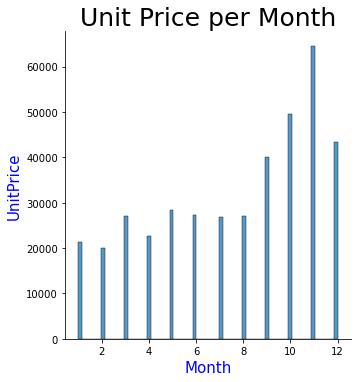

In [40]:
sns.displot(x='Month', data=df)
plt.title("Unit Price per Month",size=25)
plt.xlabel('Month', fontsize=15, c='b')
plt.ylabel('UnitPrice', fontsize=15, c='b')
plt.show()

# Applying the K-means algorithm:

In [41]:
from sklearn.cluster import KMeans

In [42]:
df.head(2)

,InvoiceNo,Quantity,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day
0,536365,6,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,6,3.39,17850.0,United Kingdom,20.34,2010,12,1


In [43]:
X = df.iloc[:, [2, 3]].values

In [44]:
X

array([[2.550e+00, 1.785e+04],
       [3.390e+00, 1.785e+04],
       [2.750e+00, 1.785e+04],
       ...,
       [4.150e+00, 1.268e+04],
       [4.150e+00, 1.268e+04],
       [4.950e+00, 1.268e+04]])

## Using the elbow method to find the optimal number of clusters

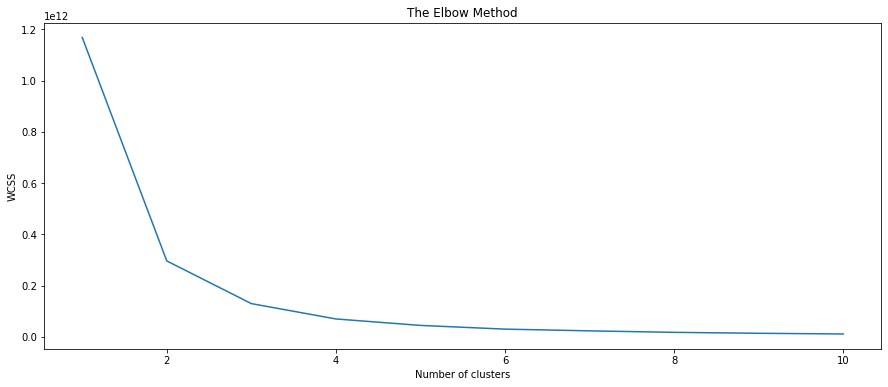

In [45]:
plt.figure(figsize=[15, 6])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## So the optimal value of our 'k' is 3

In [49]:
kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=1)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=1)

In [50]:
y_predict = kmeans.predict(X)
print(y_predict)

[1 1 1 ... 0 0 0]


In [51]:
X

array([[2.550e+00, 1.785e+04],
       [3.390e+00, 1.785e+04],
       [2.750e+00, 1.785e+04],
       ...,
       [4.150e+00, 1.268e+04],
       [4.150e+00, 1.268e+04],
       [4.950e+00, 1.268e+04]])

In [52]:
len(X)

397924

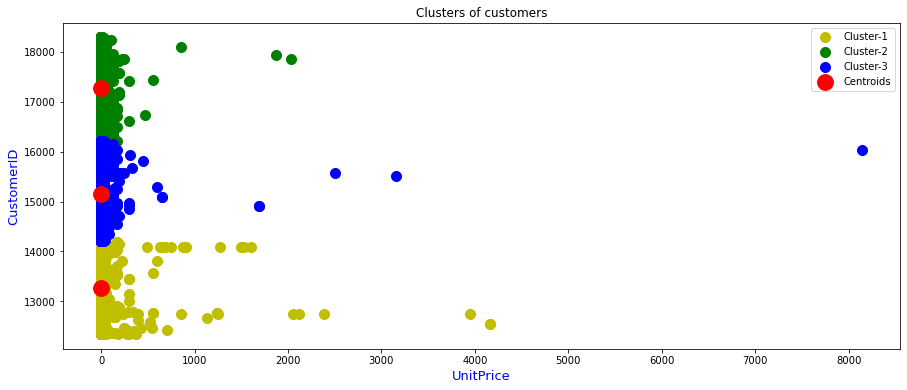

In [53]:
plt.figure(figsize=[15, 6])
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s=100, c='y', label = 'Cluster-1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s=100, c='g', label = 'Cluster-2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s=100, c='b', label = 'Cluster-3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, c='r', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('UnitPrice', fontsize=13, c='b')
plt.ylabel('CustomerID', fontsize=13, c='b')
plt.legend()
plt.show()